# THE SPARKS FOUNDATION

# Author- Aditya Dhamal

## Task 3 - Exploratory Data Analysis - Retail

### Important points for the task:- 

- Perform 'Exploratory Data Analysis' on dataset 'SampleSuperstore' 

- As a business manager, try to find out the weak areas where you can work to make more profit 

- What all business problems you can derive by exploring the dataset? 




In [87]:
#Importing the required packages to perform EDA 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pywaffle import Waffle                                               # To plot the Waffle Charts

In [88]:
# Reading the CSV file in the Data Frame

Df= pd.read_csv('C:/Users/Shree/Desktop/SampleSuperstore.csv')

#Accessing the First 5 elements of the Dataset

Df.head()                                           


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [89]:
#Checking the total amount of data in the rows and columns

print('Total rows:',Df.shape[0])
print('Total columns:',Df.shape[1])

Total rows: 9994
Total columns: 13


## Data Cleaning

Now we will clean our dataset, removing all the unnecessary null values in the data. As the first step, let us check for any null values within the dataset.


In [90]:
#Checking for NULL values in the dataset, as part of the Data Munging process

Df.isnull().sum(axis=0).to_frame()

,0
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


As we can observe , there are no NULL values in our dataset. Now, we can check the data types of the respective columns.

In [91]:
Df.dtypes.to_frame()

,0
Ship Mode,object
Segment,object
Country,object
City,object
State,object
Postal Code,int64
Region,object
Category,object
Sub-Category,object
Sales,float64


In order to simplify the typing process and we wil be working with plots, let us now map the state names to state codes.

In [92]:
#We convert the full names to 2 letter code for the sake of simplicity and ease of plotting and visualization

state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
warnings.filterwarnings("ignore")
Df['state_code'] = Df.State.apply(lambda x: state_code[x])

Our data is already pre-processed and requires no further cleaning. We can move on to perform EDA(Exploratory Data Analysis) tasks

# Exploratory Data Analysis

Now, we will perform EDA on our dataset, with a goal to find the trends within the data which might prove to be helpful for the SuperStore to increase their  respective profits.

Firstly, we will have a look at the total sales per state and the revenue generated

In [93]:
#Grouping the data based on the profits

state_data = Df[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()

#Plotting a Choropleth map in order to show the countrywide distribution

fig = go.Figure(data= go.Choropleth(
    locations = state_data.index,
    z = state_data.Sales,
    locationmode = 'USA-states',
    colorscale= 'Reds',
    colorbar_title = 'Sales (In US Dollars)'
))

fig.update_layout(
    title_text = 'Complete State Wise Sales',
    geo_scope = 'usa',
    height= 650,
)

#For displaying the figure
fig.show()


# Observations from the above Choropleth Geographical Plot-

1. The company has the highest sales in the state of California( shown in   Dark Maroon color towards the extreme left), selling around $ 450k worth of goods.


2. New York (bright red, top right corner) is the state with the second highest sales, with more than $300k worth of goods sold.


3. The state of Texas(center bottom, orange) and Washington(top left corner, orange) end up being third and fourth on the top sales charts with around USD 170K and USD 140K in total sales respectively.


4. If we observe the overall data, we will observe that the supermarket company does most of its business in the coastal region ( both East Coast and West Coast).



    
 
      
    

We can even conclude that the total sales in the State of New York is more than the total sales in all of the Central America, combined.

In [94]:
fig = go.Figure(data= go.Choropleth(
    locations = state_data.index,                 # The Spatial co-ordinates
    z = state_data.Profit,                              # Data to be colour coded
    locationmode = 'USA-states',                 # Set of location matches entries in 'Locations'
    colorscale = [[0, 'rgb(255,0,0)'], [0.25, 'rgb(255,255,255)'], [0.45, 'rgb(124,208,247)'], [0.6, 'rgb(97,255,140)'], [1,'rgb(8,181,0)']] ,
    
    colorbar_title = 'Profits in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Profit/Loss',
    geo_scope = 'usa',                              # Limit the scope to the United States
    height = 600,
)

fig.show()

## Observations from the plot are:

- The states which are Green in colour, namely California, Washington and New York are the most profitable , with profits of over $30K.


- The states in blue and light blue, with an average profit of around $25k are mostly situated in the north-east and south east region.


- The state of Texas, despite having third highest sales proved to be the most expensive state for the company with very high losses of around $25k.

# Now, we have to figure out :-

- What is the domain of the products the profitable states consumers buy?


- What products do the loss bearing states buy??


- What should be improved in order to drive the existing profits, even higher?

In [95]:
def state_data_viewer(states):
    
 #plotting the turnover according to different product categories and sub-categories for the given states.

# Figure accepts states as arguments and returns None

    product_data = Df.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1,3, figsize = (28,5))
        fig.suptitle(state, fontsize = 16)
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index+=1
        fig.show()    
        


       

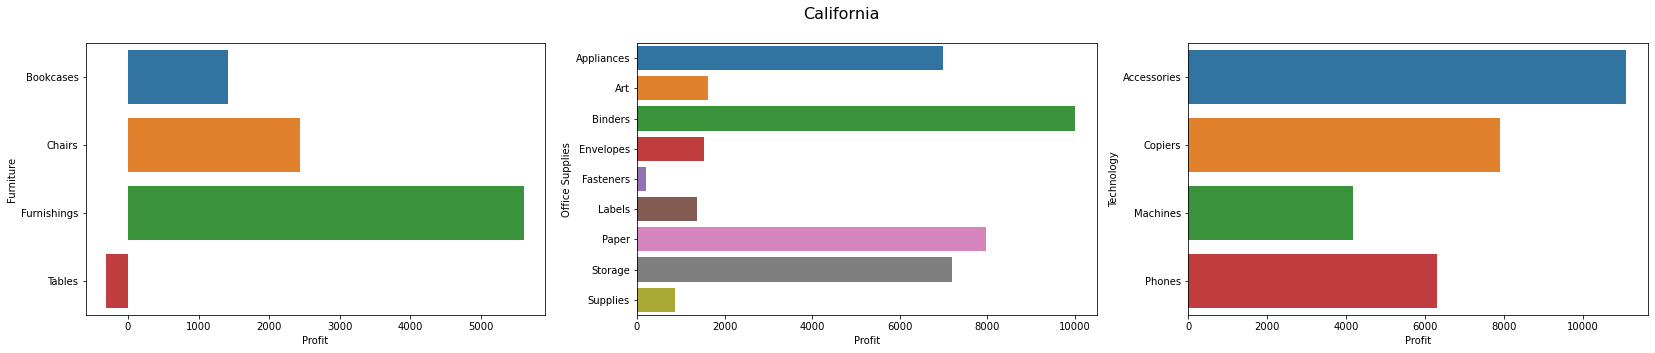

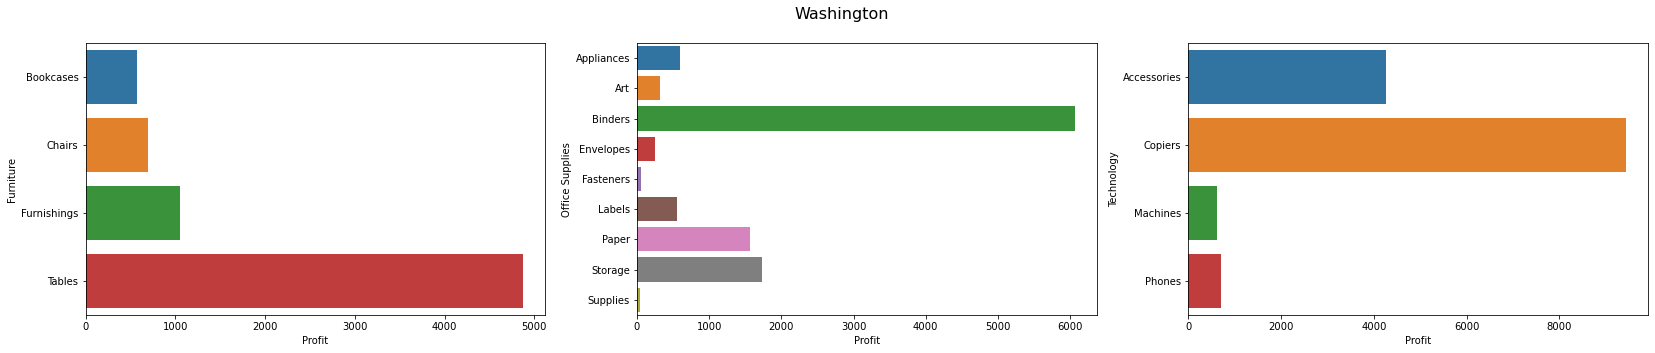

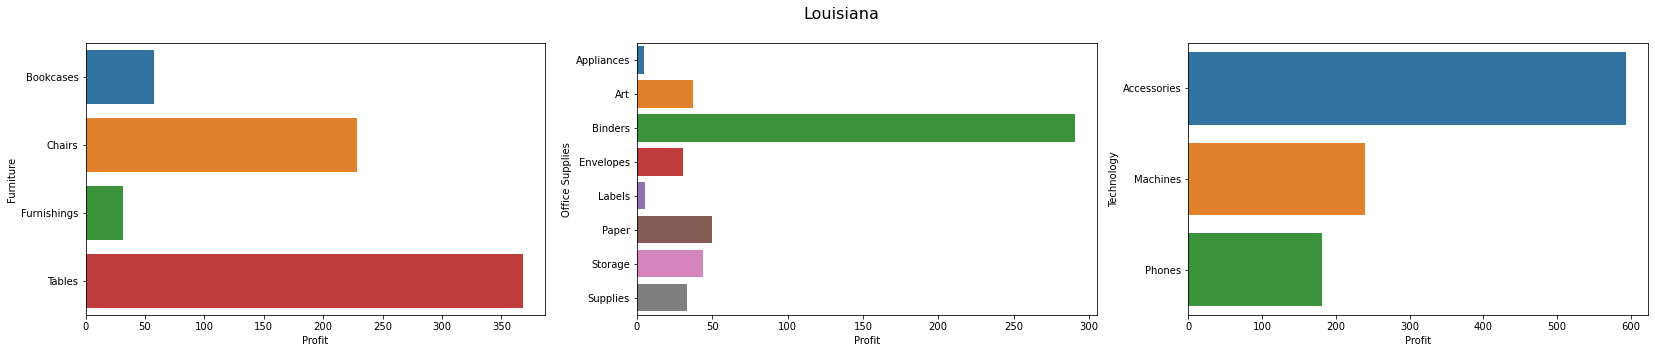

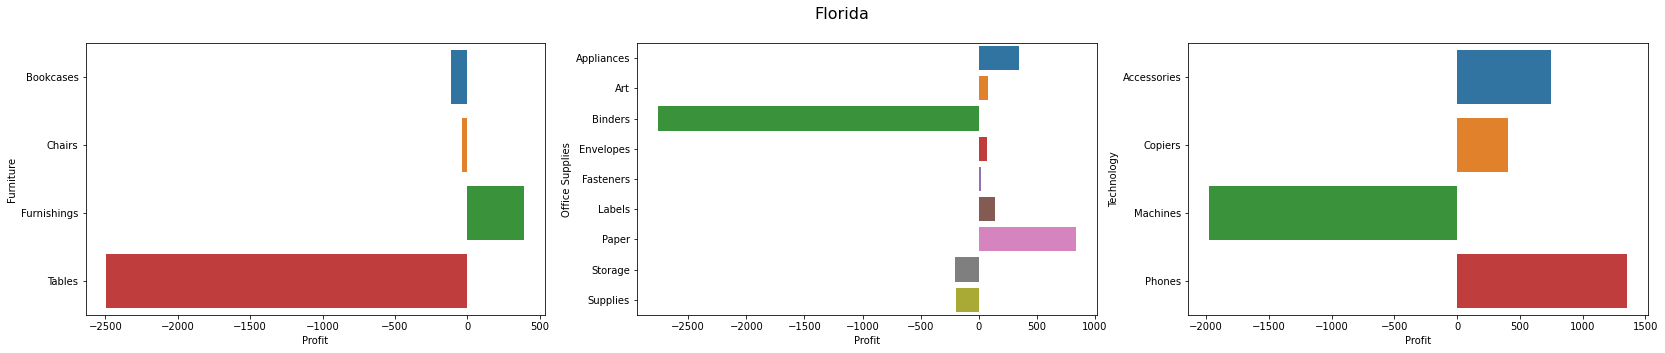

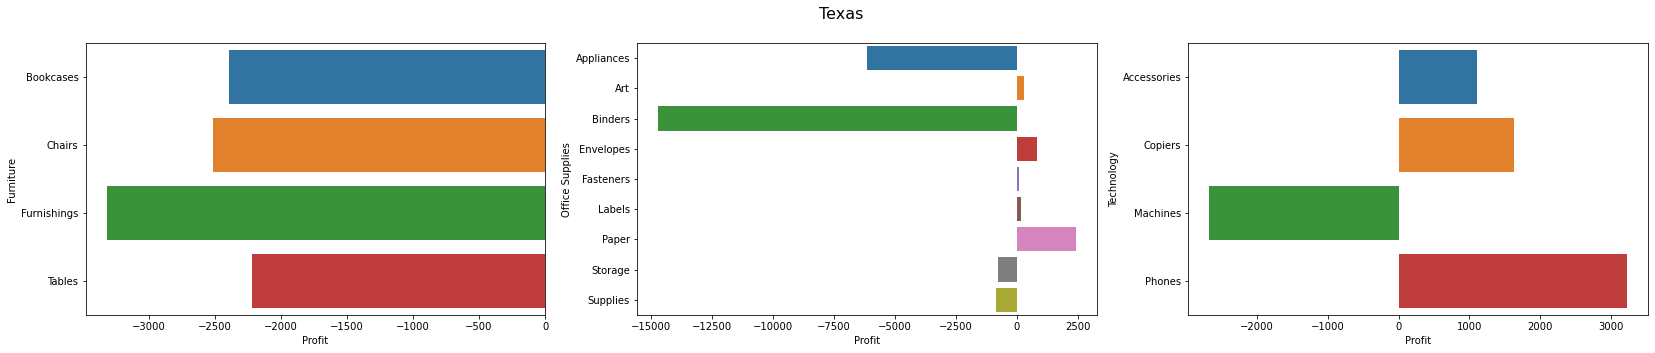

In [96]:
#Taking few states and their respective data to check for the trends of the 3 segments of the market

states = ['California', 'Washington', 'Louisiana','Florida', 'Texas']
state_data_viewer(states)

#### Observations:

1. In the state of California, the highest revenue generating state for the SuperStore while all the products sold across each category are generating high-to-low profits, 'Tables' in the 'Furniture' category is generating an overall loss. Same was the case with state of New York , the second highest revenue generating state.



2. Washington had quite a positive performance, with profits generating through all the categories. Although, a few of the low performing sub-categories are  supplies, fasteners, machines , bookcases and phones. Overall, 'Office Supplies' and 'Technology' categories make the most profit for the supermarket.



3. In the state of Louisiana, technology category specifically 'Electronic Accessories' performs way better than the 'Furniture' sector and the 'Office Supplies' sector.  Office Supplies sector performs the worst out of them all with 'Furniture' being a close Second.



4.  The state of Florida witnessed substantial losses particularly in the 'Furniture' and' Office Supplies' sector.It had decent profit margins for the 'Technology' sement. A viable option for the store would be to scrap the 'Tables 'sub-category in the Furniture and' Binders' sub-category in 'Office Supplies' altogether to curb the losses a little bit.



5. For the state of Texas, there are massive losses especially the entire 'Furniture' segment of the market accounting to the majority of the losses for the SuperStore. For them to curb from this, the possible option is not one, not two sub categories but to scrap the entire 'Furniture' Segment altogether.


### Let us now analyze the sales made in each consumer segment

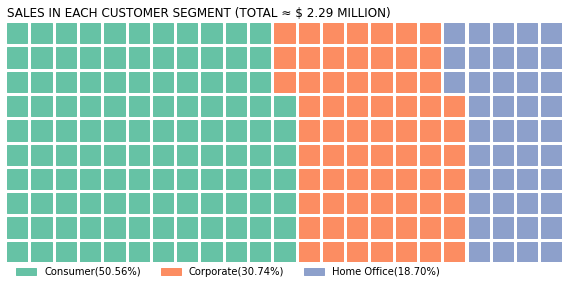

In [42]:
data = Df[['Segment', 'Sales']].groupby(['Segment']).sum()

## We will now Plot a Waffle Chart to see the overall trend of the market

fig = plt.figure(
    FigureClass = Waffle,
    figsize=(8,8),
    rows = 10,
    values = data.to_numpy()/10000,
    title={'label': 'Sales in Each Customer Segment (Total ≈ $ 2.29 million)'.upper(), 'loc':'left'},
    labels= ["{}({:.2f}%)".format(label,percent) for label,percent in zip(list(data.index), (data.Sales/data.Sales.sum()*100).to_numpy())],
    legend={'loc':'lower left', 'bbox_to_anchor': (0,-0.1), 'ncol':len(data), 'framealpha':0},
)

### Observations from the Waffle Plot:

- Slightly greater than 50% of the total sales were made in the consumer segment which comprises of individual buyers. We can conclude that the consumer segment dominates the overall market percentage of sales.


- The Corporate as well as the Home Office segments make up for around ~31% and ~19% of the total sales respectively.

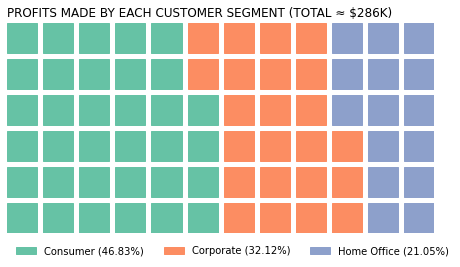

In [78]:
data = Df[['Segment', 'Profit']].groupby(['Segment']).sum()

#To plot the Waffle Chart for profits made by individual customer segments

fig = plt.figure(
    FigureClass = Waffle,
    figsize= (7,7),
    rows = 6,
    values = data.to_numpy()/4000,
    title={'label': 'Profits made by Each Customer Segment (Total ≈ $286K)'.upper(), 'loc': 'left'},
    labels=["{} ({:.2f}%)".format(label, percent) for label,percent in zip(list(data.index), (data.Profit/data.Profit.sum()*100).to_numpy())],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.15), 'ncol': len(data), 'framealpha': 0},
)

### Observations from Waffle Chart 2

- Despite having more than 50% in sales, Consumer segment's total contribution in profits margin is only around 46%. This shows that the company is bearing losses in the Consumer Section.


- Corporate and the Home Office segments are returning more profits to the SuperStore (54%) as compared to their joint sales (that is 50%).

### Company has to look into few things to increase the profits:

- They have to look into reasons as to why they are bearing more losses in the Consumer Segment and try to reduce those as much as possible.


- Other thing they can do is to provide high quality/ great services to the other Corporate and Home Office segments, thus driving the organization towards more profits.

In [83]:
 # Now, we observe the prices of products across each category and try to see the trend about how the prices are spread 
 # across each product category 

Df['price_per_product'] = Df.Sales / Df.Quantity
Df['profit_per_product'] = Df.Profit / Df.Quantity 

data = Df.groupby(['Category'])

for cat, Df in data:
    sizes = np.absolute(Df.price_per_product)
    fig = px.scatter(Df, x = 'price_per_product', title = cat.upper(), 
                    color = 'Sub-Category',
                    size = sizes, hover_data=['Sub-Category'])
    fig.update_layout(
        height = 500,
        xaxis = dict(title='Price Per Product'),
        yaxis = dict(title=''),
    )
    fig.show()




### Observations across 3 product categories:

1. <b>FURNITURE
- If we see average price, most tables and chairs are around 200 USD making them one of the most expensive furniture items. Highest table price is 500 USD whereas highest chair price is 700 USD.
- The most expensive item in the entire category is bookcase costing 800 USD.
    
    

2. <b>OFFICE SUPPLIES:
- Most of the prices are under the 100 USD mark.
- Binders and supplies are the expensive categories, highest being 1890 USD.
    

3. <b> TECHNOLOGY
-  From the Scatter Plot, we can observe that 'machines' and 'copiers' sub-categories are the most expensive items.
- Most of the products fall under the 200 USD price tag.

In [84]:
# We now check how much the product generates or loses in terms of revenue


# Another Plot for both Profit/Loss

for cat, Df in data:
    sizes = np.absolute(Df.profit_per_product)
    fig = px.scatter(Df, x = 'profit_per_product', title = cat.upper(), 
                    color = 'Sub-Category',
                    size = sizes, hover_data=['Sub-Category'])
    fig.update_layout(
        autosize = True,
        height = 500,
        xaxis = dict(title='Profit/Loss Per Product'),
        yaxis = dict(title=''),
    )
    fig.show()

### Observations:

1. <b>FURNITURE
- It is evident that 'Tables' are one of the major businesses where the SuperStore is losing most of its money. Same is the case for 'Bookcases'

- If we see overall performance, 'Chairs' seem to be generating the highest profits for the 'SuperStore'.

2. <b>OFFICE SUPPLIES
- While binders generate most revenue for the company, its is also one of the highest loss sub-category for the SuperStore.

3. <b>TECHNOLOGY
- The company's machine sales cause the highest loss, going as high as 1300 USD in losses.

In [60]:
# We now draw the bar chart to observe the losses based on the sub-category

for cat, Df in data:
    subCat = Df.groupby(['Sub-Category']).sum()
    fig = px.bar(subCat, y = 'Profit', title = cat.upper(), 
                    color = subCat.index)
    fig.update_layout(
        autosize = True,
        width = 600,
        yaxis = dict(title='Profit/Loss Per Product Sub-Category'),
        xaxis = dict(title=''),
    )
    fig.show()

### From the plots, we can observe that:

- Tables and Bookcases are the businesses where the company is losing most of its money.

- Machine segment makes the least profit whereas the Technology segment makes the most profits for the company.

- Furniture is a segment where the company is barely making any considerable profit. This ought to have something to do with the Shipping expenses for the Furniture items

In [104]:
# We now look at the various shipping modes and the roles they play

ship_segment = Df.groupby(['Segment'])
segment_list = Df.Segment.value_counts().index
cat_list = Df.Category.value_counts().index

for segment in segment_list:
    seg_shipping = ship_segment.get_group(segment)
    standard, second, first, same = [], [], [], []
    for cat in cat_list:
        count = seg_shipping.groupby(['Category']).get_group(cat)['Ship Mode'].value_counts()
        standard.append(count[0]), second.append(count[1]), first.append(count[2]), same.append(count[3])
        
        fig = go.Figure()
    fig.add_trace(go.Bar(x = cat_list,y = standard,name='Standard Class',marker_color='rgb(137,51,51)'
                        ))
    fig.add_trace(go.Bar(x = cat_list,y = second,name='Second Class',marker_color='rgb(234,84,84)'
                        ))
    fig.add_trace(go.Bar(x = cat_list,y = first,name='First Class',marker_color='rgb(250,127,78)'
                        ))
    fig.add_trace(go.Bar(x = cat_list,y = same,name='Same Day',marker_color='lightsalmon'
                        ))

    fig.update_layout(
        barmode ='group',
        width = 600,
        title = segment.upper(),
        yaxis = dict(title = 'Number of Deliveries'))
    fig.show()


### Observations from the above given plot-

- Standard Class Shipping is the most widely used shipping method used across all the customer segments and product categories.


- Across all 3 segments, office supplies are the most bought products, and the technology items are least bought products are technology items.

In [66]:
# Now we check the loss each shipping category bears

Df['loss'] = Df.Profit.apply(lambda x: x if (x < 0) else 0)

fig = px.bar( Df,x = 'Ship Mode', y = 'loss', title = 'Losses in Each Shipping Category'.upper(), 
                    color = 'Ship Mode', hover_data=['loss', 'Sub-Category'])
fig.update_layout(
        autosize = True,
        width = 800,
        yaxis = dict(title='Total Loss'),
        xaxis = dict(title='Shipping Categories'),
    )
fig.show()

### Observations

- Highest losses while delivering products was via 'Standard Class' as its a no brainer since majority of the products were delivered using this method. The highest loss that went over was $6,600 USD in a single sale.


- First Class and Same Day shipping have almost the same losses, since the number of sales shipped under each category were almost equal

In [70]:
# For the final section of EDA, we will see how discounts affect the sales of product as well as the revenue generated by it

Df['whether_discount'] = Df.Discount.apply(lambda x: 'No Discount' if (x == 0) else 'Discount')

discount_data = Df.groupby(['whether_discount']).mean()

def discount_plotter(data_type = 'total'):

#Now, we will plot discount related graphs to check the data as well as the average and total prices, sales etc

    color = ['rgb(81,81,246)', 'rgb(209,70,70)']
    if data_type == 'average':
        discount_data = Df.groupby(['whether_discount']).mean()
        fig = make_subplots(rows=1, cols=3, subplot_titles=('AVERAGE SALE', 'AVERAGE PROFIT/LOSS', 'AVERAGE PRICE PER PRODUCT'))
    else:
        discount_data = Df.groupby(['whether_discount']).sum()
        fig = make_subplots(rows=1, cols=3, subplot_titles=('TOTAL SALES', 'TOTAL PROFIT/LOSS', 'TOTAL PRICE PER PRODUCT'))
    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.Sales, marker_color = color),
            row=1, col=1
    )
    
    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.Profit, marker_color = color),
            row=1, col=2
    )

    fig.add_trace(
        go.Bar(x = discount_data.index, y = discount_data.price_per_product, marker_color = color),
            row=1, col=3
    )
    fig.update_layout(showlegend=False)
    fig.show()
    
discount_plotter('average')
discount_plotter()


### Important Observations:

1.  Considering both average and total sales, it seems that people tend to buy more things when it is selling at a discounted price. 



2. On an average, a discounted product price is around USD 62, whereas the same is around USD 59 for a non discounted item.


3. The company has made a total profit of around USD 320K on non-discounted sales, incurring losses of around USD 34K on discounted sales.

As we can observe the 'SuperStore', by incurring small losses by discounts, stands to gain more profits in the future by attracting more long term customers. Therefore, the small losses incurred are an essential part of the company's business as the company stands more to gain in the long term.

## CONCLUSION

In this way, we have successfully performed Exploratory Data Analysis(EDA) on the given SuperStore dataset and have explored all the segments, possibilities as well as minute aspects where the company stands to gain or lose respectively.

The main cause of SuperStore's losses are the 'Furniture' segment(which needs to be scrapped in few negatively performing states), 'Machines' segment(which needs a few overhauls) , logistics division particularly 'Standard Class Shipping' (needs to be reworked), and the Festival/Seasonal discounts that incur frequent losses.